In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [42]:
# Replace with the actual path to the NSL-KDD dataset
col_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

train_data = pd.read_csv('KDDTrain+_20Percent.txt',header=None, names = col_names)
test_data = pd.read_csv('KDDTest-21.txt',header=None, names = col_names)

In [43]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [44]:
print('Dimensions of the Training set:',train_data.shape)
print('Dimensions of the Test set:',test_data.shape)

Dimensions of the Training set: (25192, 43)
Dimensions of the Test set: (11850, 43)


In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

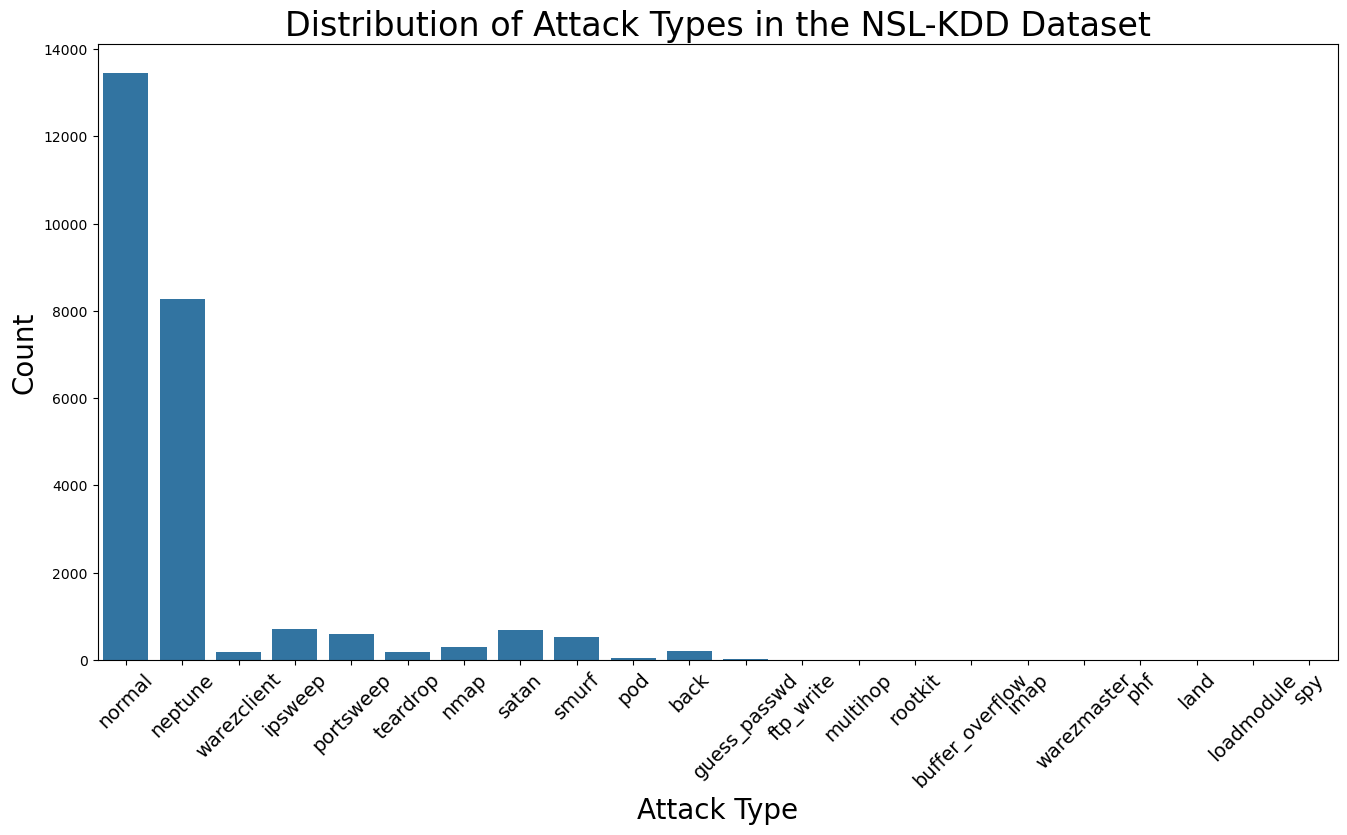

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
sns.countplot(x='attack', data=train_data)
plt.title('Distribution of Attack Types in the NSL-KDD Dataset', fontsize=24)
plt.xlabel('Attack Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.savefig('Distribution_attack_types_NSL-KDD.jpg')

# Show the plot
plt.show()

In [47]:
train_data["attack"] = train_data["attack"].apply(lambda x: "normal" if x == "normal" else "anomalous")
test_data["attack"] = test_data["attack"].apply(lambda x: "normal" if x == "normal" else "anomalous")

In [48]:
train_data.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomalous,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [49]:
#data preprocessing for training dataset

#checking for missing values
missing_columns= [col for col in train_data.columns if train_data[col].isnull().sum() > 0]
print(f"Number of missing columns: {missing_columns} ")
#checking for duplicate rows
print(f"Number of duplicate rows: {train_data.duplicated().sum()}")

Number of missing columns: [] 
Number of duplicate rows: 0


In [50]:
#data preprocessing for testing dataset

#checking for missing values
missing_columns= [col for col in test_data.columns if test_data[col].isnull().sum() > 0]
print(f"Number of missing columns: {missing_columns} ")
#checking for duplicate rows
print(f"Number of duplicate rows: {test_data.duplicated().sum()}")

Number of missing columns: [] 
Number of duplicate rows: 3


In [51]:
# Removing duplicate rows
test_data.drop_duplicates(inplace=True)

# Check the shape of the dataset after removing duplicates
print(f"New shape of the dataset: {test_data.shape}")
#we can see that the no. of rows reduced by 3

New shape of the dataset: (11847, 43)


In [52]:
#Apply LabelEncoding to all the categorical columns (those with data type 'object')

from sklearn.preprocessing import LabelEncoder
 
def LabelEncoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

LabelEncoding(train_data)
LabelEncoding(test_data)

In [53]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,19,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1,20
1,0,2,41,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1,15
2,0,1,46,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,19
3,0,1,22,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,21
4,0,1,22,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,21


In [54]:
X_train = train_data.drop(["attack"], axis=1)
y_train = train_data["attack"]
X_test = test_data.drop(["attack"], axis=1)
y_test = test_data["attack"]

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

np.random.seed(42)

rfc = RandomForestClassifier() 

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [56]:
import itertools 
from tabulate import tabulate

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'level']

In [57]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

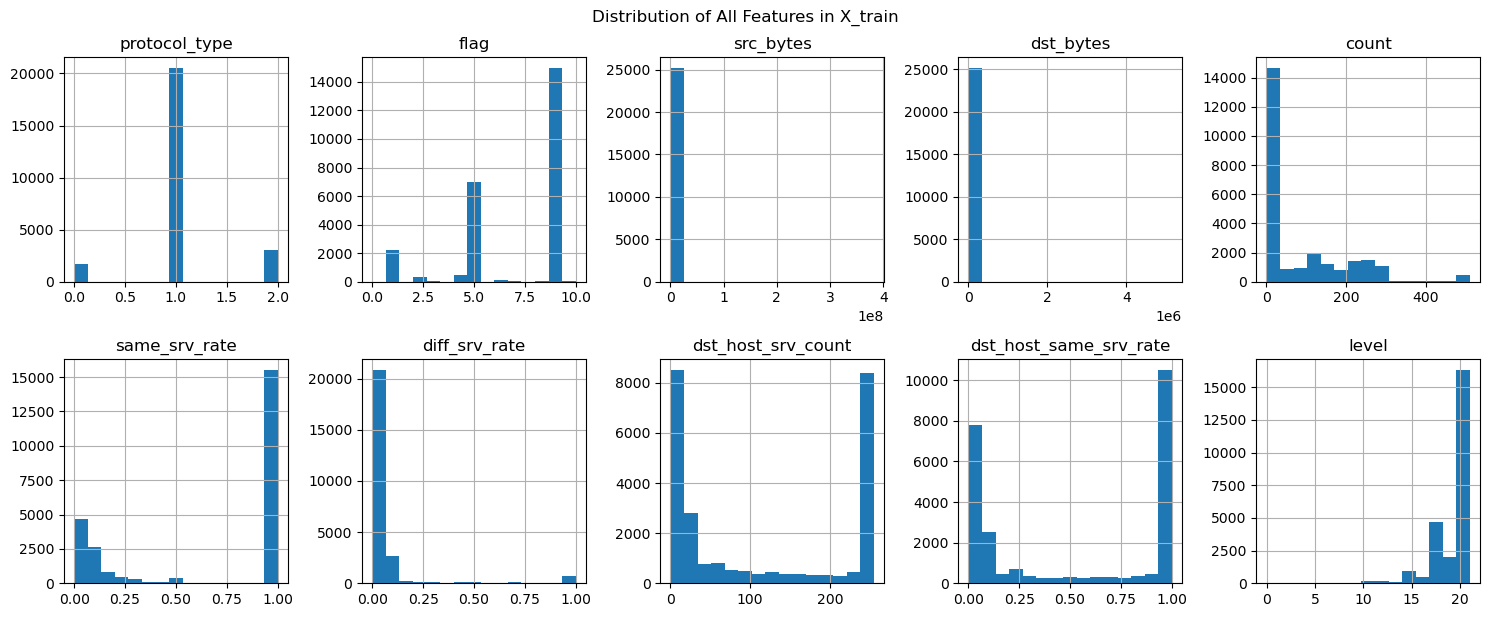

In [58]:
import matplotlib.pyplot as plt
import math

# Number of features in X_train
num_features = X_train.shape[1]

# Set up grid dimensions
cols = 5  # You can adjust this for more or fewer columns
rows = math.ceil(num_features / cols)

# Plot histograms for all features
plt.figure(figsize=(15, rows * 3))
for i, col in enumerate(X_train.columns, 1):
    plt.subplot(rows, cols, i)
    X_train[col].hist(bins=15)
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Distribution of All Features in X_train", y=1.02)
plt.show()


In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight='balanced')
parameters = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=RF, param_grid=parameters, cv=5)

# Fit on the training data
grid_search.fit(X_train, y_train)

# Best parameters and best model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 20, 'n_estimators': 200}


In [63]:
final_model = RandomForestClassifier(n_estimators=100, max_depth=20,class_weight='balanced')
final_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20)

In [64]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
predictions = final_model.predict(X_test)

# Print metrics
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.7033004136068203
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.66      0.79      9695
           1       0.37      0.88      0.52      2152

    accuracy                           0.70     11847
   macro avg       0.66      0.77      0.65     11847
weighted avg       0.85      0.70      0.74     11847



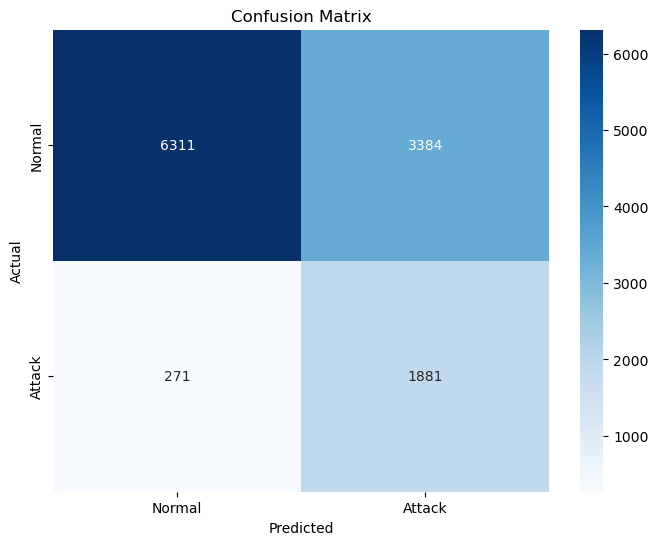

              precision    recall  f1-score   support

           0       0.96      0.65      0.78      9695
           1       0.36      0.87      0.51      2152

    accuracy                           0.69     11847
   macro avg       0.66      0.76      0.64     11847
weighted avg       0.85      0.69      0.73     11847



In [65]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on test data
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


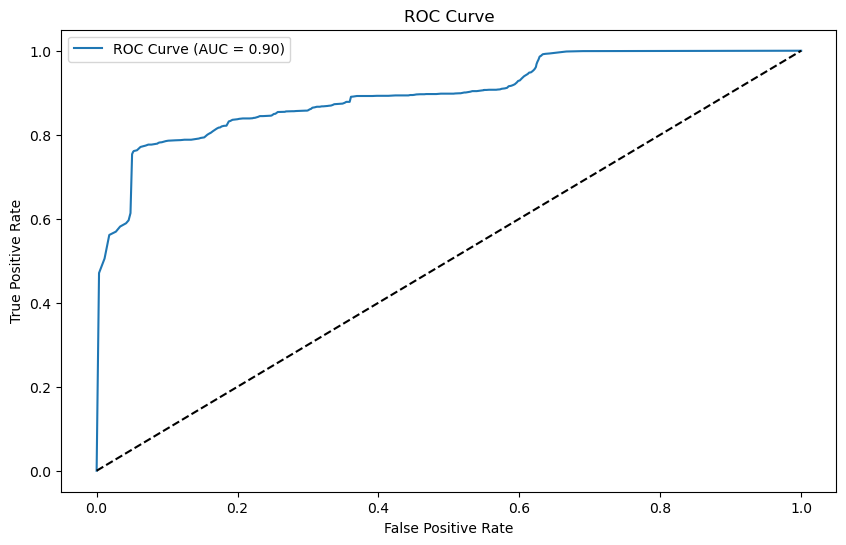

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities and ROC curve
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()
